# __Exploratory data analysis (EDA)__
- Selecting and indentifing features importance
- Dataset: Guarujá Municipality - São Paulo - Brazil
- Part 1/3

## Authorship:
        Caio Azevedo
        São Paulo University, February, 2024

## Main goals:

Exploratory data analysis: identification of possible irrelevant attributes, dataset profiling, interpretation of features.

In exploratory data analysis, the main goal is to gain insights and understand the data before diving into more advanced analysis or modeling. This involves identifying possible irrelevant attributes, performing dataset profiling, and interpreting the features.

First, it is important to look for potential attributes that may not contribute significantly to the analysis or modeling process. These could be variables that have a high percentage of missing values, constant values, or very low variance. Removing these irrelevant attributes can help simplify the dataset and improve computational efficiency.

Next, dataset profiling is crucial to get an overview of the data. This includes summarizing the main statistics of each attribute such as mean, standard deviation, minimum, maximum, and quartiles. Visualizations, such as histograms and box plots, can also be used to understand the distribution and identify outliers. Profiling the dataset provides a better understanding of the nature and characteristics of the data.

Interpreting the features is another important step in exploratory data analysis. It involves analyzing the relationships between variables and understanding their impact on the target variable. This can be done through correlation analysis, scatter plots, or other visualization techniques. Feature interpretation helps identify meaningful patterns and relationships within the data.

- Better understanding landslides phenomenum throught out theirs features analytis
- Searching for features importance identification
- Exploratory data analysis: identification of possible irrelevant attributes, dataset profiling, interpretation of features.
- Feature importance techniques:
   - Correlation matrix;
   - SelectKBest (F-test for feature scoring - feature selection based on ANOVA for numerical input and categorical output)
   - SelectPercentile (univariate statistical tests)
   - Feature Importance (from RandomForestClassifier)
   - IGR (information gain ratio) - feature engineering;      

## About features:

- __slope__: Slope degree is one of the most frequently-used factors in assessing landslide susceptibility. It has a great influence on slope stability and is directly related to the different types of mountain hazards. The slope is characterized as one of the **main parameters** that influence the triggering of landslides since it is related to the velocity of the surface and groundwater flow and, consequently, to the moisture content of the soil, capillary pressure and distribution of saturated and non-saturated zones (Gómez and Kavzoglu, 2005; Zêzere et al., 2017). It is considered as one of critical causing landslide hazard in areas with sharp slope due to soil weakness and stresses.

- __aspect__: It is defined as the direction of terrain surface, such as north, northeast and so on. Since hillsides orientated differently receive direct solar radiation and rainfall in different amounts, which lead to different slope topography, humidity and plant cover, the slope aspect is also accepted as a conditioning factor. This factor, generally, represents the compass orientation that a slope or hillshade confronts. It is also can be used as indication for some measurements of plants group, soil moistures and evaporation. 

- __elevation__: It represents the elevations present in the region and is a widely used parameter in modeling processes. Its variation has a noticeable effect on susceptibility models depending on the region. (Nourani et al., 2014; Hong et al., 2016; Al-Najjar et al., 2019).
 
- __land_use__: 10 = Forest, 20 = Anthropogenic field; 30 = Urban area; 40 = Mangrove.

- __lithology__:  classify different types of rocks. In this study they are: Arine sediments or Migmatites

- __twi__: topographic wetness index: is defined as a theoretical measure of flow accumulation and hence soil moisture at any point within a basin. From this, landslide susceptibility can be estimated as a function of the relationship of the topographic effects on the hydrological response of an area (Gómez and Kavzoglu, 2005; Tien Bui et al., 2017). In a seminal work, Beven and Kirkby (1979) proposed the Eq. 1 for the calculation of the topographic wetness index, assuming static conditions: 
$ twi = ln \left( \frac {A_s} {tan \beta} \right) $, where ${A_s}$ is the upslope contributing area per unit contour length and ${tan \beta}$ is the local slope. Thus, the index reflects the tendency of soil saturation developing at any point in a basin (in terms of ${A_s}$), as well as the tendency of the gravitational forces to provide the flow, expressed in terms of ${tan \beta}$ as an approximation of the hydraulic gradient (Pourghasemi et al., 2012).

- __curvature__: Curvature is defined as the change rate of slope angle with surface plane. The direction of drainage line is influenced by plan curvature types, and the river erosion is a key factor that affects the slope stability. Curvature has been frequently used in landslide studies attributing to its **ability  to  control  the  water flow** on the surface (Pham et al. 2015). It is defined as the **inverse of the value of the radius of the curvature of the line** (Nefeslioglu, Duman, and Durmaz 2008). Due to the inverse proportionality tighter curves tend to have higher values of curvature as compared to wider curves (Ding, Chen, and Hong 2017). 

## Coding

### Imported libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from utils import plot
%matplotlib inline

In [2]:
from pandas_profiling import ProfileReport
APP_PATH = os.getcwd()

### Auxiliary functions

In [3]:
#Split the dataset into trainning, test and validation samples
def dataPreparation(dataSet):
    X = dataSet.drop('class',axis=1)
    y= dataSet['class']
    
    # split data into training, validation and testing sets
    seed = 7
    test_size = 0.30
    
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=test_size, shuffle=False)
    train_x, val_x, train_y, val_y   = train_test_split(train_x,train_y, test_size=test_size, shuffle=False)

    return train_x, test_x, val_x, train_y, test_y, val_y

In [4]:
#Pearson correlation matrix as a criterion for eliminating highly correlated features..
#Find and remove correlated features.
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method ='pearson') 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

### Select the dataset

In [5]:
# Switch the sample to analyse.

#file = "guaruja_radius_50m_shuffled.csv"
#file = "guaruja_radius_100m_shuffled.csv"
#file = "guaruja_radius_150m_shuffled.csv"
file = "guaruja_radius_200m_shuffled.csv"

#file = "guaruja_buffer_1km_shuffled.csv"
#file = "guaruja_buffer_2km_shuffled.csv"
#file = "guaruja_buffer_3km_shuffled.csv"
#file = "guaruja_buffer_4km_shuffled.csv"

#file = "guaruja_random.csv"

dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", file))) 

dataset.head(5)

,FID,X,Y,twi,curvature,slope,elevation,aspect,lithology,land_use,class
0,174,380188.0000,7355077.000,4.319798,-0.015372,33.860043,25.912239,277.485138,65,90,1
1,1,369756.0000,7344220.000,16.590740,-0.043386,0.727488,0.418544,159.017288,2,90,0
2,62,376611.0000,7353497.000,16.493561,-0.011949,1.114157,1.117189,142.506317,2,90,0
3,110,372569.0000,7346250.000,5.782696,-0.010980,20.309313,9.144706,306.605927,2,30,1
4,109,370946.0334,7346022.025,4.132583,-0.000184,43.904831,46.628563,316.640686,2,30,1


In [6]:
#Get data analysis features only.
dataset = dataset[['slope','aspect','elevation','land_use','lithology','twi','curvature','class']]
dataset.head(5)

,slope,aspect,elevation,land_use,lithology,twi,curvature,class
0,33.860043,277.485138,25.912239,90,65,4.319798,-0.015372,1
1,0.727488,159.017288,0.418544,90,2,16.590740,-0.043386,0
2,1.114157,142.506317,1.117189,90,2,16.493561,-0.011949,0
3,20.309313,306.605927,9.144706,30,2,5.782696,-0.010980,1
4,43.904831,316.640686,46.628563,30,2,4.132583,-0.000184,1


In [7]:
df = dataset

### Dataset analysis

In [8]:
profile = ProfileReport(df, title="Feature Analysis - Guarujá - São Paulo - Brazil")
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.describe()

,slope,aspect,elevation,land_use,lithology,twi,curvature,class
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,19.819352,200.242757,47.632923,69.644670,33.340102,5.820614,0.121187,0.502538
std,12.338918,105.750161,54.066843,29.938298,31.579848,3.014336,2.038134,0.501267
min,0.027905,0.304541,0.000000,20.000000,2.000000,1.371374,-18.467907,0.000000
25%,11.590302,108.774246,7.822109,30.000000,2.000000,4.025763,-0.018913,0.000000
50%,20.691257,202.567291,25.912239,90.000000,2.000000,4.956263,-0.004308,1.000000
75%,27.523371,302.536682,69.848534,90.000000,65.000000,6.411908,0.020883,1.000000
max,68.520325,359.505798,230.082230,120.000000,65.000000,16.590740,11.098160,1.000000


In [10]:
df_max = df.max()
df_min = df.min()
df_range = df_max - df_min
df_range

slope         68.492420
aspect       359.201257
elevation    230.082230
land_use     100.000000
lithology     63.000000
twi           15.219366
curvature     29.566067
class          1.000000
dtype: float64

### Feature importance

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

Three benefits of performing feature selection before modeling your data are:
- Reduces overfitting: fewer redundant data means less opportunity to make decisions based on noise.
- Improves accuracy: fewer misleading data means that modeling accuracy improves.
- Reduces training time: less data means that algorithms train faster.


Filter methods evaluate the relevance of the predictors outside of the predictive models and subsequently model only the predictors that pass some criterion.

- The __filtering__ methods evaluate the relevance of predictors __outside__ the context of the predictive model and subsequently, they only model the predictors that meet certain criteria. That is what we used.estão estão 

- Finally, there are some machine learning algorithms that perform feature selection automatically as part of model learning. These techniques are referred to as __intrinsic or embedded__ feature selection methods. Some models have built-in feature selection, meaning that the model will only include predictors that help maximize accuracy. In these cases, the model can select and choose the best data representation.



- A seleção de features também está relacionada a técnicas de redução dimensional em que ambos os métodos buscam menos variáveis de entrada para um modelo preditivo. A diferença é que a seleção de features seleciona recursos para manter ou remover do conjunto de dados, enquanto a redução de dimensionalidade cria uma __projeção dos dados__, resultando em features de entrada inteiramente novos. Como tal, a redução de dimensionalidade é uma alternativa à seleção de recursos, em vez de um tipo de seleção de recursos.


A common mistake done with feature selection is to search a subset of discriminative features on the full dataset
instead of only using the training set. 

Some of the most important references for this research are:
- ref. 1 (paper):  __Review of Input Variable Selection Methods for Artificial Neural Networks__
- ref. 2 (paper):  __Machine Learning Feature Selection Methods for Landslide Susceptibility Mapping__
- ref. 3 (paper):  __Attribute selection using correlations and principal components for artificial neural networks employment for landslide susceptibility assessment__

   - In article 3, the authors conclude that attribute selection and removal attempts made the performance of their neural network worse than using the 11 initial attributes used in the study. The authors used Pearson correlation and PCA. However, this is not a rule as described in the article itself.

   - Pearson correlation (rank correlation): The selection of candidate variables that are sorted by order of decreasing correlation is based either on greedy selection of the first k variables, or upon all variables for which the correlation is significantly different from zero. The significance of the Pearson correlation can be determined directly, since the error associated with estimation of correlation from a sample is defined by the t-distribution. A rule of thumb (for large n) is that variables with an absolute correlation greater than:  $$ \frac {2} {\sqrt{n}} $$ are significant.
   
   - Another correlation-based technique used is ANOVA correlation coefficient. The ANOVA method is a type of F-statistics referred to here as ANOVA F-test. The results of this test can be used for feature selection, where features that are independent of the target variable can be removed from the dataset.

#### Pearson correlation

In [11]:
corr_features = correlation(df, 0.8)
print(corr_features)
print('Correlated features: ', len(set(corr_features)) )

set()
Correlated features:  0


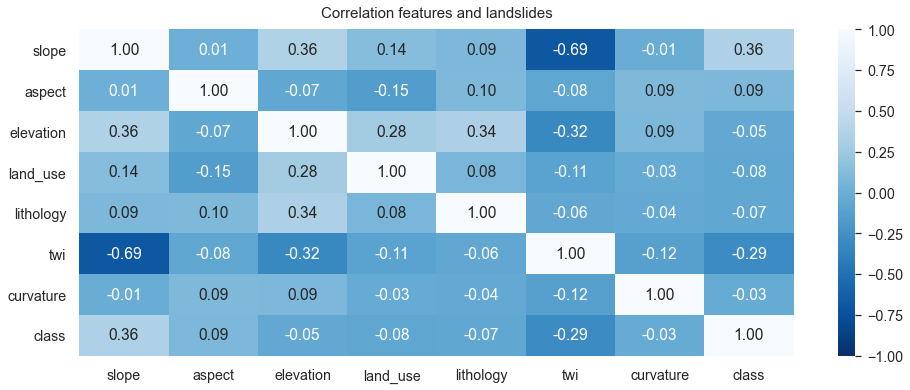

In [12]:
#Correlation matrix for the entire sample
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.3)
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, fmt = '.2f',cmap='Blues_r') #BrBG
heatmap.set_title('Correlation features and landslides', fontdict={'fontsize':15}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap_class.jpg', dpi=300, bbox_inches='tight')

In [13]:
X_train, X_test, X_val, y_train, y_test, y_val = dataPreparation(df)
print(len(X_train), 'train examples')
print(len(X_val), 'validation examples')
print(len(X_test), 'test examples')

95 train examples
42 validation examples
60 test examples


In [14]:
corr_features = correlation(X_train, 0.8)
print(corr_features)
print('Correlated features: ', len(set(corr_features)) )

set()
Correlated features:  0


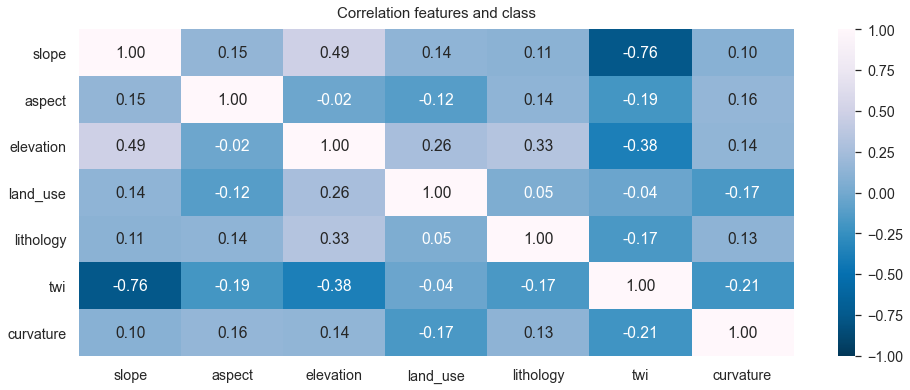

In [15]:
#Correlation matrix for the entire sample
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.3)
heatmap = sns.heatmap(X_train.corr(),vmin=-1, vmax=1, annot=True, fmt = '.2f',cmap='PuBu_r')
heatmap.set_title('Correlation features and class', fontdict={'fontsize':15}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap_features.jpg', dpi=300, bbox_inches='tight')

- __Since none of the variables exhibit a correlation above 0.8, they are considered independent. Based on this criterion, we will retain all of the variables.__

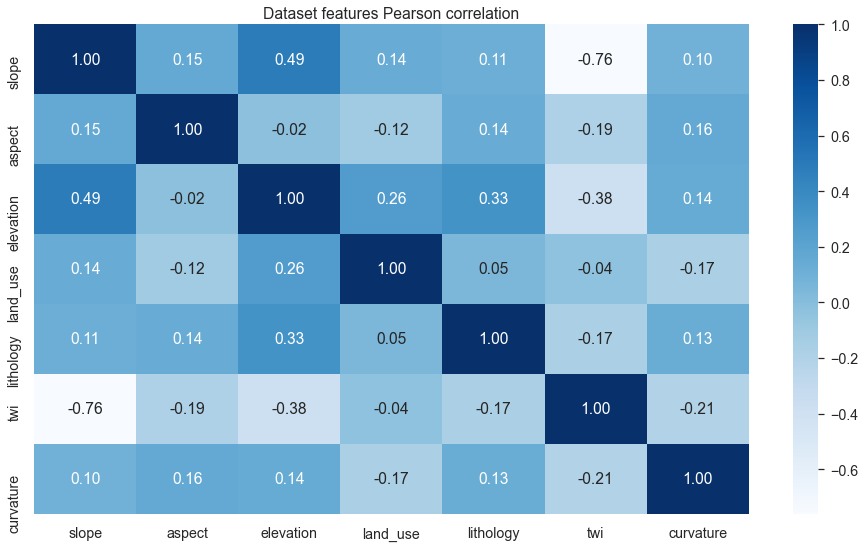

In [16]:
sns.set(font_scale=1.3)
plt.figure(figsize=(16, 9))
sns.heatmap(X_train.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Dataset features Pearson correlation')
plt.show()

#### ANOVA / F-test

__Features Selection__ - sklearn.feature_selection SelectKBest class, select the K-best features

- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
-  https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection_pipeline.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-pipeline-py
- https://qastack.com.br/datascience/10773/how-does-selectkbest-work
- https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476 (sobre ANOVA)
- https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/ (mais sobre ANOVA e f-test)
- https://statisticsbyjim.com/anova/f-tests-anova/ (anova)

  
 
 

In [17]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Setup KBestFeatures class. k=5 most important features
fs = SelectKBest(score_func=f_classif, k=5)
# Apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)

(95, 5)


In [18]:
predictors = X_train.columns
predictors

Index(['slope', 'aspect', 'elevation', 'land_use', 'lithology', 'twi',
       'curvature'],
      dtype='object')

In [19]:
fs.pvalues_

array([4.17533594e-07, 1.37067134e-01, 2.99632793e-01, 6.37731817e-01,
       7.40823251e-01, 4.30315497e-07, 2.85473765e-01])

In [20]:
fs.scores_

array([29.66321773,  2.24924128,  1.08793585,  0.22318324,  0.11005917,
       29.58610589,  1.15409119])

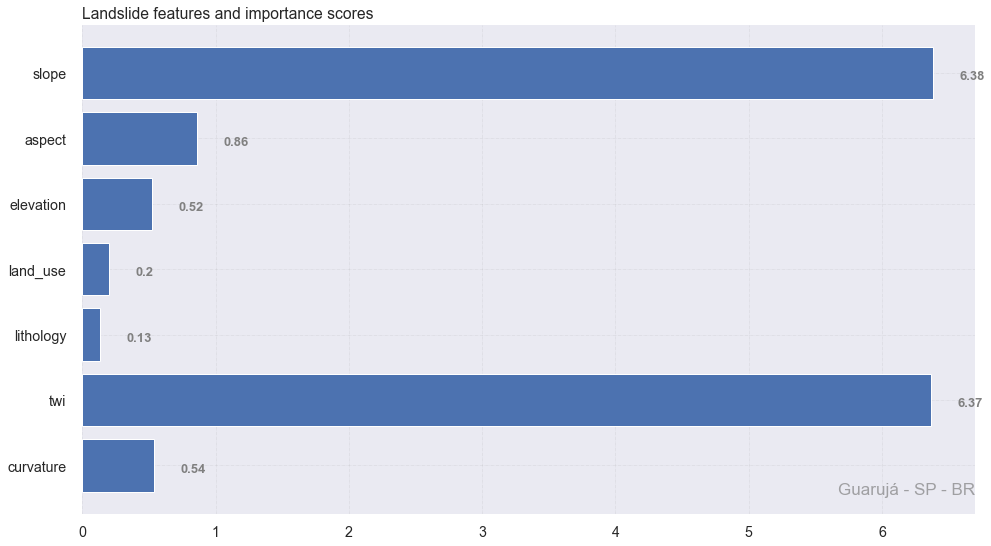

In [21]:
# get the p-values to each feature and turn them into 'scores'

predictors = X_train.columns

scores = -np.log10(fs.pvalues_) #or scores /= scores.max()
scores = np.round(scores, 2)


fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(predictors, scores)
 
# Remove spines 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# show values 
ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')
 
# Chart title
ax.set_title('Landslide features and importance scores',loc ='left', )
 
# watermark
fig.text(0.9, 0.15, 'Guarujá - SP - BR', fontsize = 17,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# chart configuration
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()

In [22]:
from sklearn.feature_selection import SelectPercentile

In [23]:
# define feature selection - o que seria esse percentile ?
fsP = SelectPercentile(score_func=f_classif, percentile=20)
# aplica a seleção de features
X_selected = fsP.fit_transform(X_train, y_train)
print(X_selected.shape)

(95, 2)


In [24]:
predictors = df.columns
predictors

Index(['slope', 'aspect', 'elevation', 'land_use', 'lithology', 'twi',
       'curvature', 'class'],
      dtype='object')

In [25]:
fsP.scores_

array([29.66321773,  2.24924128,  1.08793585,  0.22318324,  0.11005917,
       29.58610589,  1.15409119])

In [26]:
# show the main features
predictors = df.columns
nr_features = len(df.columns)
i = fsP.scores_.argsort()[::-1][:nr_features]
top_features = np.column_stack((predictors[i],
                                        fsP.scores_[i],
                                        fsP.pvalues_[i],
                                        -np.log10(fsP.pvalues_[i])
                                        ))

print("\nTop %i Features:" % nr_features)
features = pd.DataFrame(top_features, columns=["token", "score", "p-val","scored-p-val"])
print(features, "\n")


Top 8 Features:
       token      score     p-val scored-p-val
0      slope  29.663218       0.0     6.379309
1        twi  29.586106       0.0     6.366213
2     aspect   2.249241  0.137067     0.863067
3  curvature   1.154091  0.285474     0.544434
4  elevation   1.087936  0.299633     0.523411
5   land_use   0.223183  0.637732     0.195362
6  lithology   0.110059  0.740823     0.130285 



In [27]:
features["normalized-scored-p-val"] = features["scored-p-val"]/features["scored-p-val"].max()
features["normalized-score"] = features["score"]/features["score"].max()
features

,token,score,p-val,scored-p-val,normalized-scored-p-val,normalized-score
0,slope,29.663218,0.0,6.379309,1.0,1.0
1,twi,29.586106,0.0,6.366213,0.997947,0.9974
2,aspect,2.249241,0.137067,0.863067,0.135292,0.075826
3,curvature,1.154091,0.285474,0.544434,0.085344,0.038906
4,elevation,1.087936,0.299633,0.523411,0.082048,0.036676
5,land_use,0.223183,0.637732,0.195362,0.030624,0.007524
6,lithology,0.110059,0.740823,0.130285,0.020423,0.00371


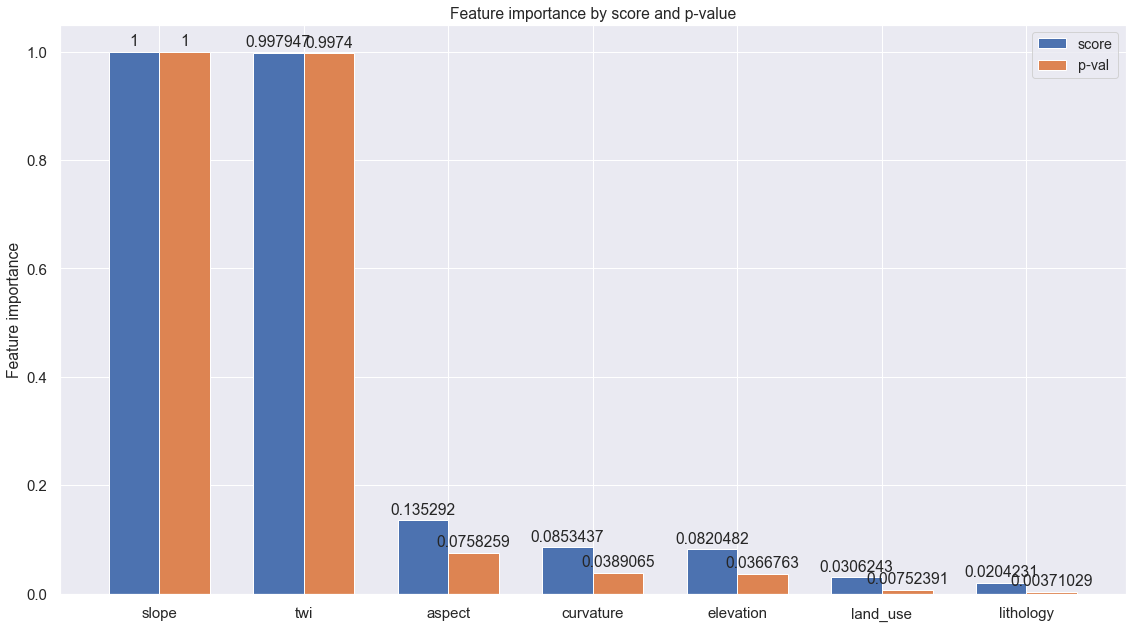

In [28]:
x = np.arange(len(features.index))  # the label locations
width = 0.35  # bars width
fig, ax = plt.subplots(figsize =(16, 9))

rects1 = ax.bar(x - width/2, features["normalized-scored-p-val"], width, label="score")
rects2 = ax.bar(x + width/2, features["normalized-score"], width, label='p-val')

ax.set_ylabel('Feature importance')
ax.set_title('Feature importance by score and p-value')
ax.set_xticks(x)
ax.set_xticklabels(features['token'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y lab
plt.show()

#### Embedded ou intrinsic features importance 
- Bagged decision trees, such as Random Forest and Extra Trees, may be used to estimatefeature importance.

Text(0.5, 1.0, 'Features Importance')

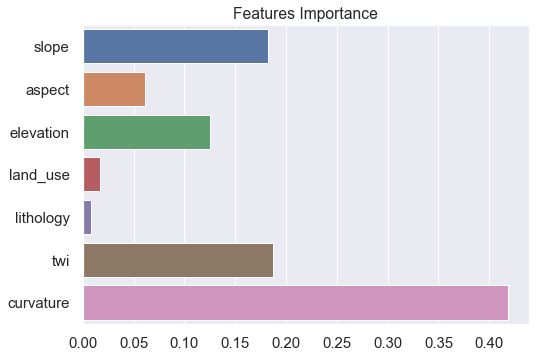

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
predictors = X_train.columns
model  = RandomForestClassifier() 
model.fit(X_train, y_train) # Feature importance 
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Features Importance')

Text(0.5, 1.0, 'Features Importance')

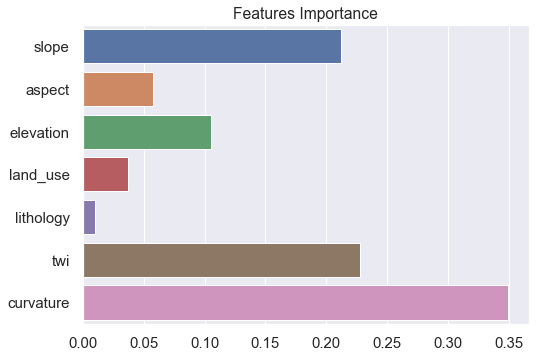

In [30]:
predictors = X_train.columns
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train) 
model.feature_importances_
importances = pd.Series(data=model.feature_importances_, index=predictors)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Features Importance')

## References

__Papers__:
- ref.1: New ensemble models for shallow landslide susceptibility modeling in a semi-aridwatershed
- ref.2: Spatial prediction models for shallow landslide hazards: a comparative assessment of the efficacy of support vector machines, artificial neural networks, kernel logistic regression, and logistic model tree
- ref.3: Landslide susceptibility mapping with r.landslide: A free open-source GIS-integrated tool based on Artificial Neural Networks
- ref.4: Attribute selection using correlations and principal components for artificial neural networks employment for landslide susceptibility assessment
- ref.5: Review of Input Variable Selection Methods for Artificial Neural Networks
- ref.6: Machine Learning Feature Selection Methods for Landslide Susceptibility Mapping
- ref.7: Support vector regression modeling of coal flotation based on variable importance measurements by mutual information method
- ref.8: Applied Predictive Modeling with Applications in R 


__Internet__:

- ref.1: https://www.datasklr.com/ols-least-squares-regression/variable-selection  (somente casos de regressão)
- ref.2: https://machinelearningmastery.com/information-gain-and-mutual-information/
- ref.3: https://machinelearningmastery.com/calculate-feature-importance-with-python/
- ref.4: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- ref.5: https://link.springer.com/article/10.1007/s00170-020-05641-y
- ref.6: https://www.sciencedirect.com/science/article/abs/pii/S096599781200004X
- ref.7: https://www.sciencedirect.com/science/article/pii/S2666546820300288
- ref.8: https://www.datacamp.com/community/tutorials/feature-selection-python
- ref.9: https://www.kdnuggets.com/2020/01/explaining-black-box-models-ensemble-deep-learning-lime-shap.html
- ref.10: https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c
- ref.11: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- ref.12: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile
- ref.13: https://python.hotexamples.com/pt/examples/sklearn.feature_selection/SelectPercentile/-/python-selectpercentile-class-examples.html
- ref.14: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection (excelent)
- ref.15: https://www.kaggle.com/code/asimislam/python-colors-color-cmap-palette

__More about pandas profiling__:

1. run miniconda as administrator
2. pip install pandas-profiling ==2.7.1 
3. jupyter nbextension enable --py widgetsnbextension # enable the widget extension in jupyter

- We may face a issue like this:
[Pandas-profiling] ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic'

- If so, than use the following workaround:

  - Edit the file "~/[your_conda_env_path]/lib/site-packages/visions/dtypes/boolean.py"
  - Find the row "from pandas.core.dtypes.generic import ABCIndexClass, ABCSeries" and just replace ABCIndexClass for ABCIndex.
  - Save the boolean.py file and enjoy your report!